In [93]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import emcee
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
names = ['1','2','3','4','5','6']
labels = [r'\Omega_m', r'\sigma_8', r'\alpha_\lambda', r'\beta_\lambda',r'\gamma_\lambda',r'\sigma_\lambda']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [95]:
n_cut=490000

In [146]:
n_cut=490000
path = '../../capish_sbi_data/config_sbi_DESlike4_replicate_standard_prior_6_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_Nm'), allow_pickle = True)
N_Nm4 = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+Nm (SBI)')

t = np.load(path.format('count'), allow_pickle = True)
N4 = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='count (SBI)')

t = np.load(path.format('Nm'), allow_pickle = True)
Nm4 = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'Nm')

Removed no burn in
Removed no burn in
Removed no burn in


In [147]:
def read_mcmc(file):
    backend = emcee.backends.HDFBackend(file)
    chain = backend.get_chain(discard=0, thin=1, flat=True)  
    print(len(chain))
    return chain

In [148]:
n_cut=26000
path = '../validation_capish_comparison_to_standard_approach/mcmc_chains/chains_{}.h5'

t = read_mcmc(path.format('count_only'))
N_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count (MCMC)')

t = read_mcmc(path.format('mass_only'))
m_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'm (MCMC)')

t = read_mcmc(path.format('count_mass'))
Nm_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+m (MCMC)')

45000
Removed no burn in
45000
Removed no burn in
45000
Removed no burn in


In [149]:
params_fid=[0.319,0.813,3.5,1.72,0,0.2]
#params_fid=[0.319,0.813,3.5,0.8,0.3]

In [150]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

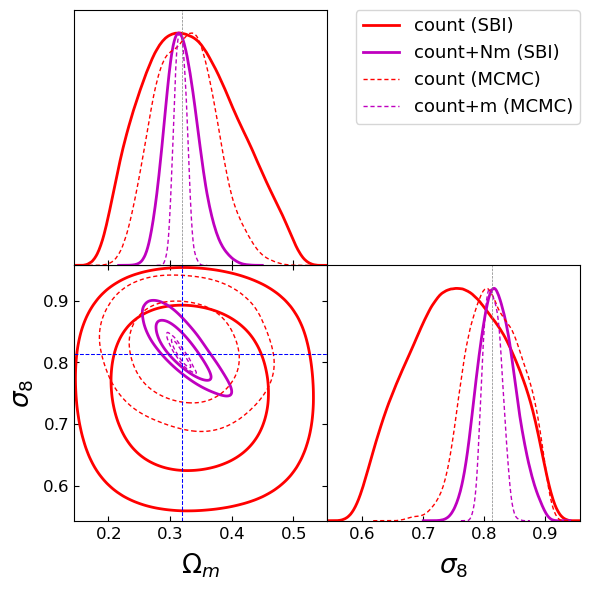

In [155]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 14
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot([N4, N_Nm4, N_mcmc, Nm_mcmc],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[False, False, False,False, False,True], 
                contour_colors = ['r', 'm', 'r', 'm', 'orange', 'c' ], 
                contour_ls=['-','-','--', '--', '-','-',],
                contour_lws=[2,2,1,1],shaded=False,
                legend_fontsize = 10,
                params=['1','2'],
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_SBI.png', dpi = 300)

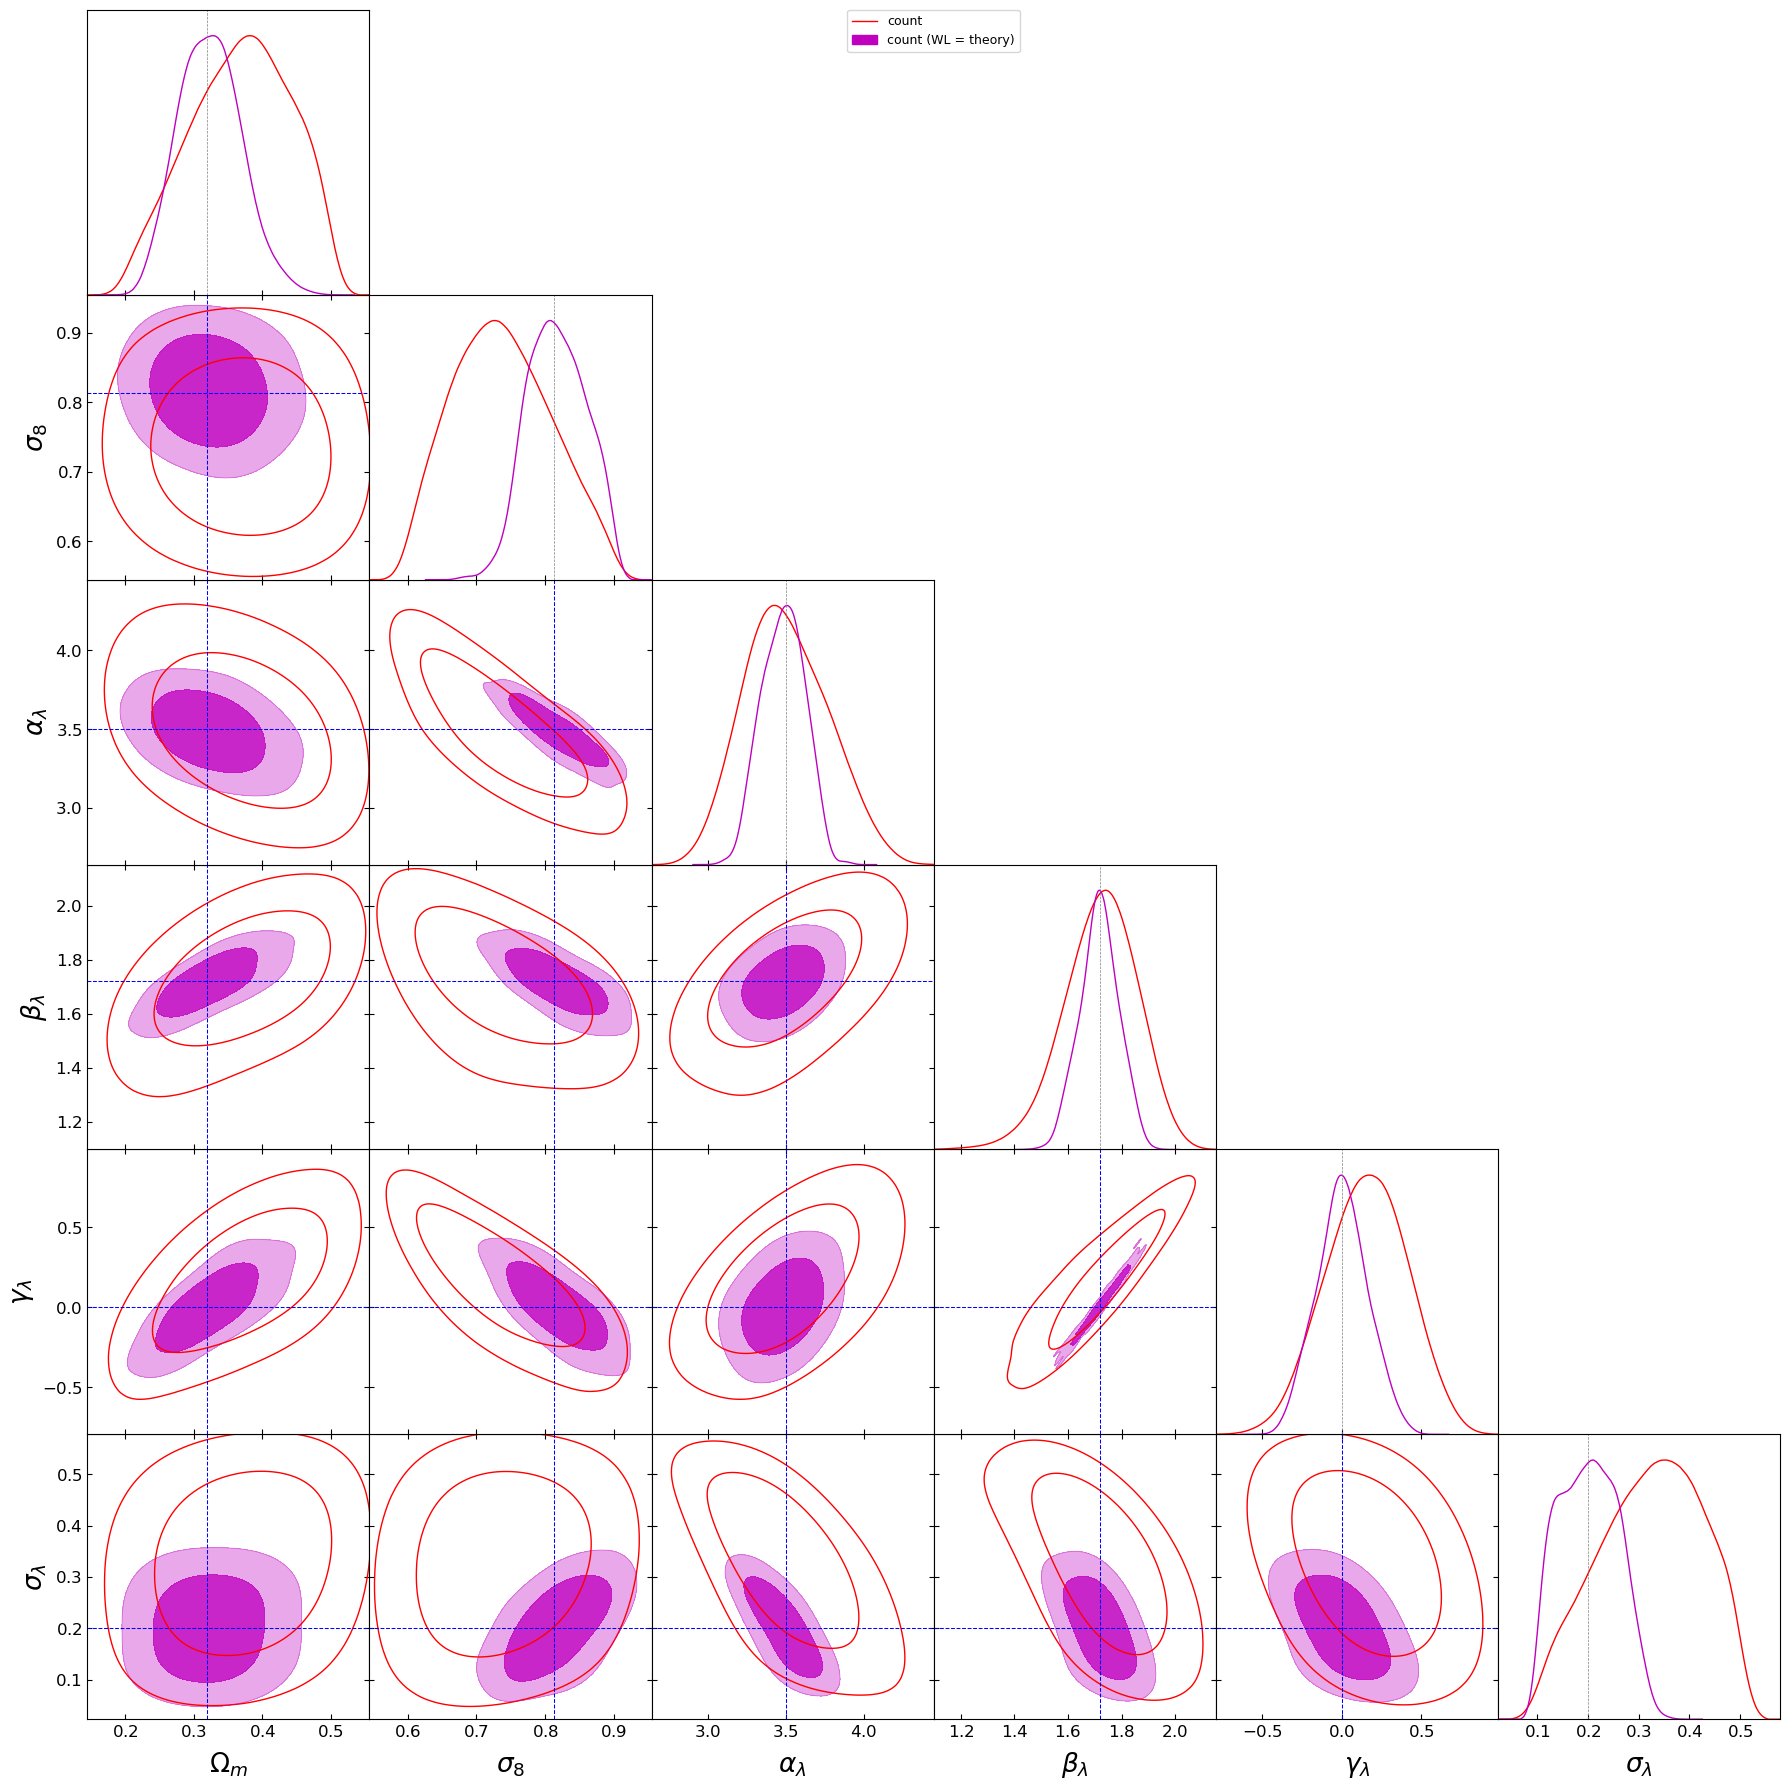

In [118]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 10
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot([N4, N_mcmc],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[False, True, False,False, False,True], 
                contour_colors = ['r', 'm', 'g', 'b', 'orange', 'c' ], 
                contour_ls=['-','-','-', '-', '-','-',],
                contour_lws=1,shaded=False,
                legend_fontsize = 10,
                params=['1','2','3','4','5','6'],
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)
#plt.savefig(f'mcmc_SBI.png', dpi = 300)

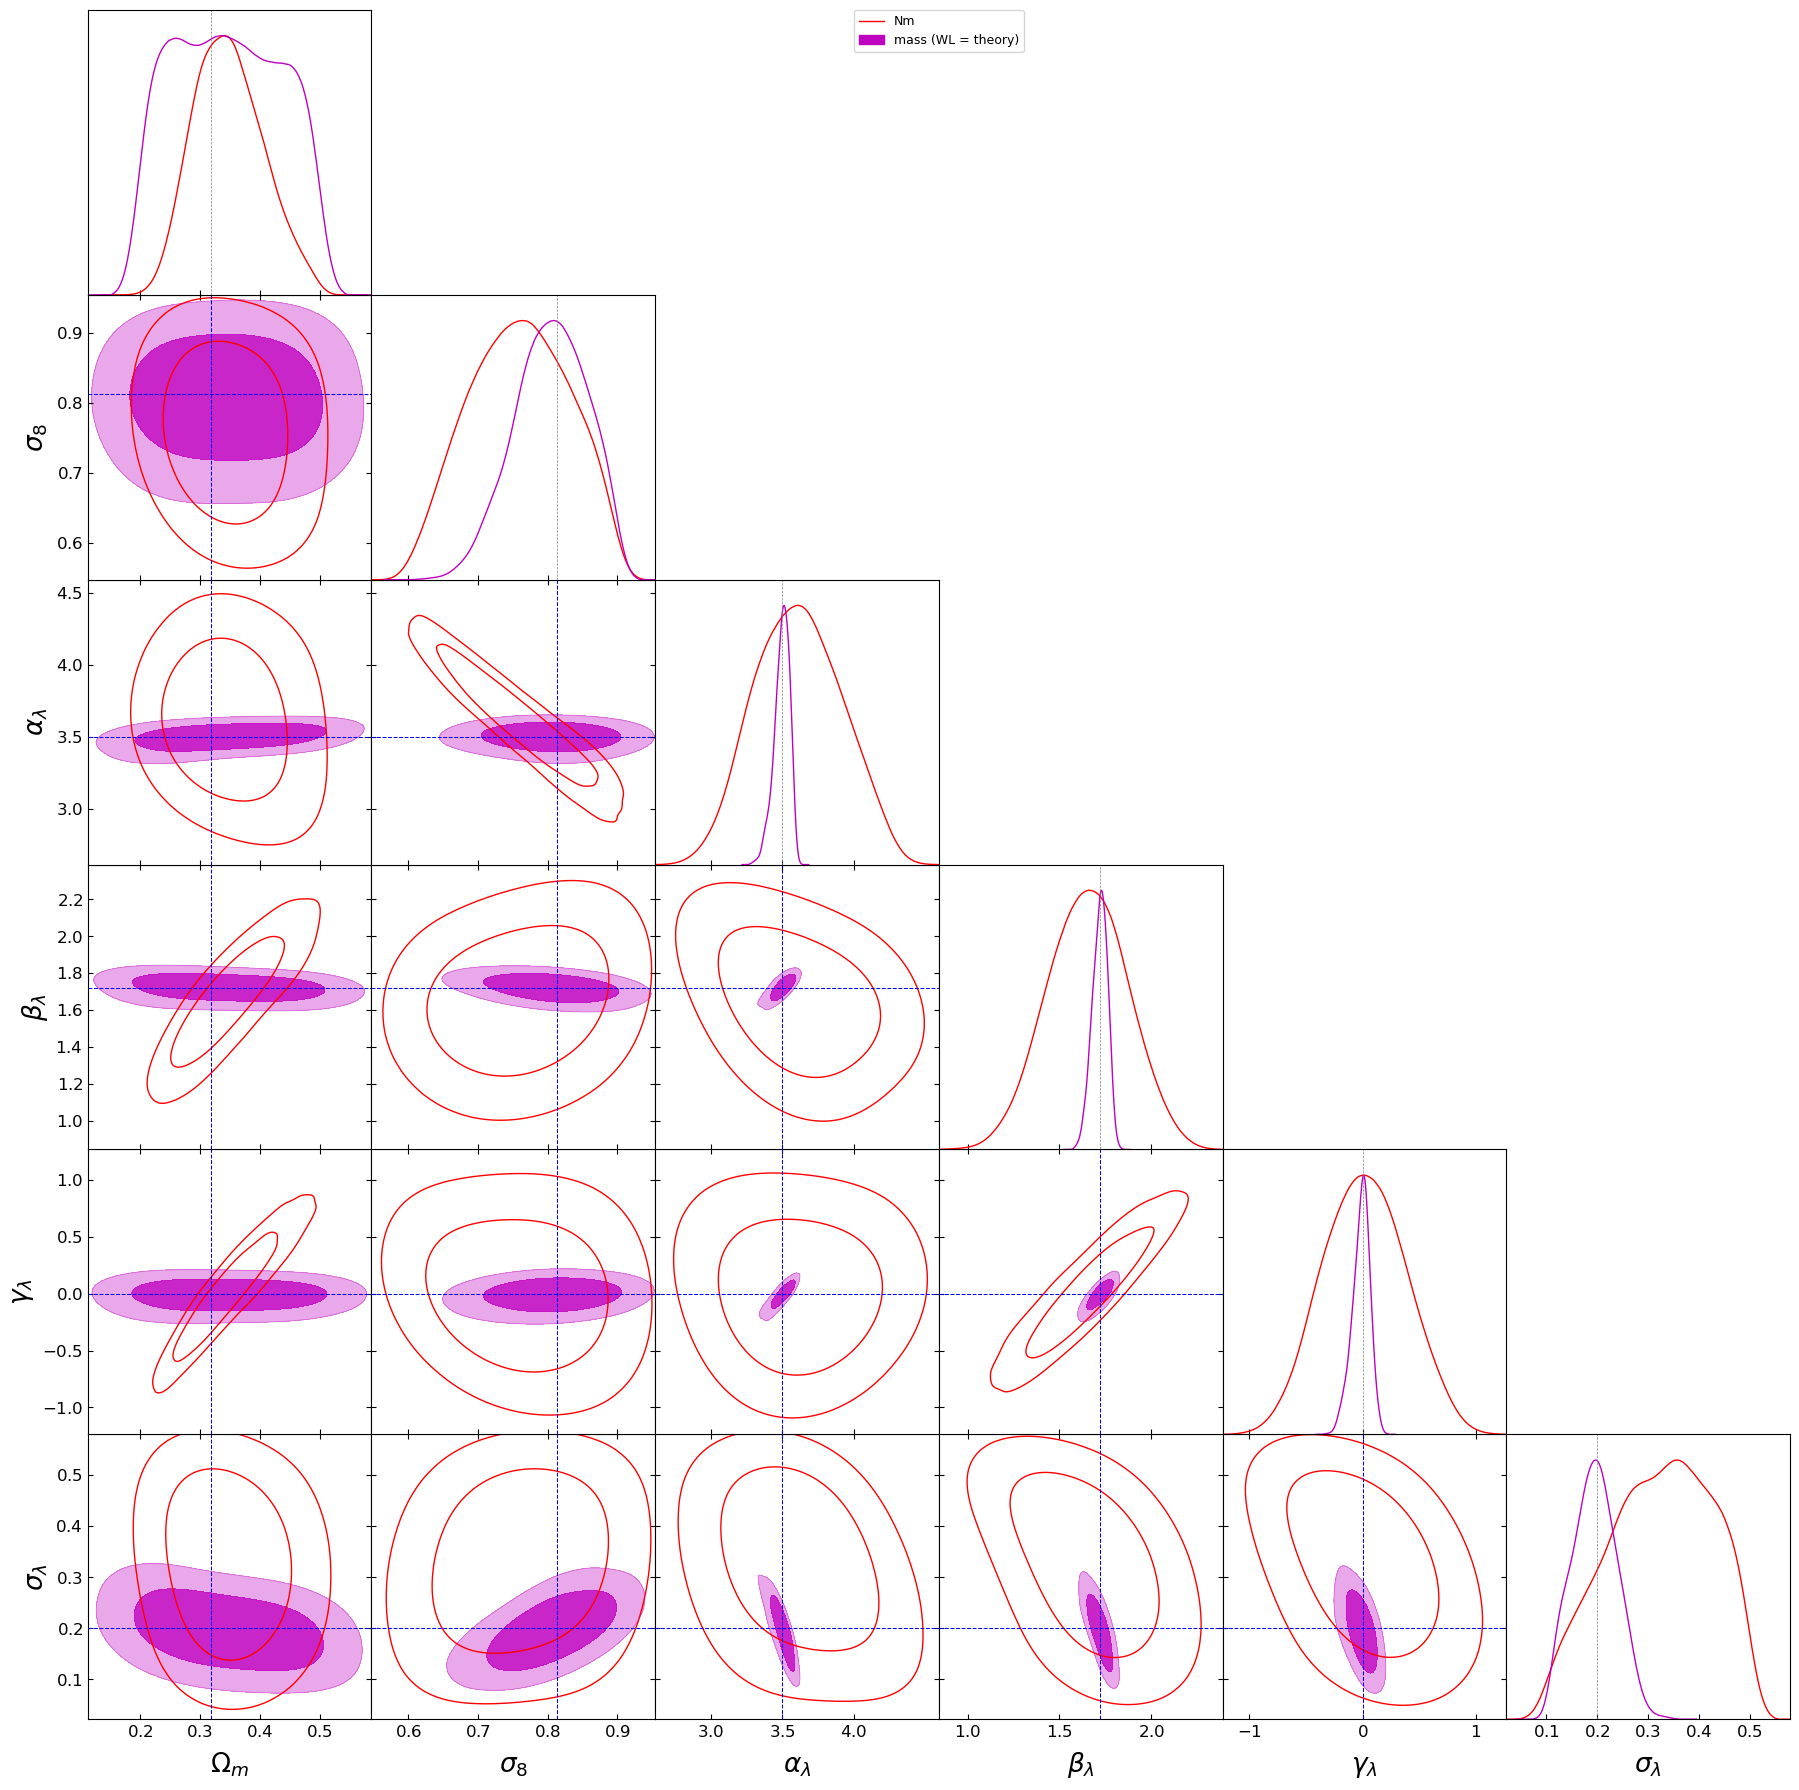

In [120]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 10
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot([Nm4,m_mcmc,],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[False, True, False,False, False,True], 
                contour_colors = ['r', 'm', 'g', 'b', 'orange', 'c' ], 
                contour_ls=['-','-','-', '-', '-','-',],
                contour_lws=1,shaded=False,
                legend_fontsize = 10,
                params=['1','2','3','4','5','6'],
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)
#plt.savefig(f'mcmc_SBI.png', dpi = 300)